<a href="https://colab.research.google.com/github/StephenTGibson/genetic-algorithms/blob/main/Solving_TSP_using_GA_plotting_routes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
import matplotlib

# load tsp ga class from github
!git clone https://github.com/StephenTGibson/genetic-algorithms.git &> /dev/null
import sys
sys.path.append('/content/genetic-algorithms')
from travellingSalespersonProblem import *

In [2]:
def makeRealGraph(numLocations, bounds):

    locationsArray = np.zeros((numLocations, bounds.shape[0]))

    for dimIdx in range(bounds.shape[0]):
        locationsArray[:, dimIdx] = rng.uniform(low=0, high=bounds[dimIdx], size=numLocations)

    graph = np.zeros((numLocations, numLocations))
    # iterate over row indices
    for rowIdx in range(numLocations):

        for colIdx in range(rowIdx+1, numLocations):

            graph[rowIdx, colIdx] = np.linalg.norm(locationsArray[rowIdx] - locationsArray[colIdx])

    graph += graph.T

    return locationsArray, graph

In [87]:
nodes = 16
bounds = np.array([100, 100])
locArr, graph = makeRealGraph(numLocations=nodes, bounds=bounds)

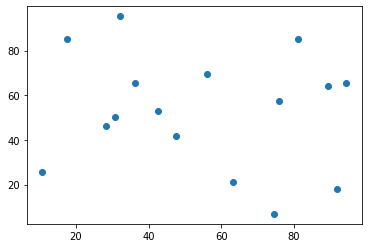

In [88]:
fig, ax = plt.subplots()

ax.scatter(
    x=locArr[:,0],
    y=locArr[:,1]
)

plt.show()

In [89]:
# initialise ga
initialPopulation = 120
selectionMechanism = 'Roulette'
crossoverPoints = 6#'random'
elitism = True
mutation = True
mutationRate = 0.1
tsp = TravellingSalespersonGA(
    initialPopulation,
    selectionMechanism,
    crossoverPoints,
    elitism,
    mutation,
    mutationRate,
    graph,
    )
# perform evolution
generations = 1200
earlyStopGenerations = generations
tsp.evolve(
    generations,
    earlyStopGenerations,
    )
# random benchmark
rand = TravellingSalespersonGA(
    initialPopulation,
    selectionMechanism,
    crossoverPoints,
    elitism,
    mutation,
    mutationRate,
    graph,
    )
# perform random
rand.randomBenchmark(generations)

# results
factorial = 1
current = 1
while current <= nodes:
    factorial = current * factorial
    current += 1
print(f'Permutations: {(factorial):.1e}')
print(f'Max possible solutions evaluated: {(initialPopulation*generations):.1e}')

Permutations: 2.1e+13
Max possible solutions evaluated: 1.4e+05


In [90]:
best = np.array(tsp.pop)[tsp.validArr][np.argmax(tsp.fitArr[tsp.validArr])]

In [91]:
pathArray = np.zeros((nodes+1, bounds.shape[0]))

for idx, loc in enumerate(best):
    pathArray[idx] = locArr[loc]


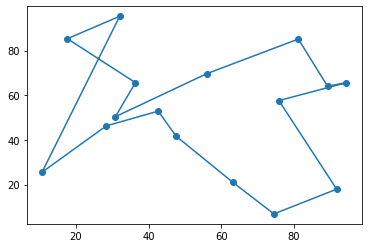

In [92]:
fig, ax = plt.subplots()

ax.scatter(
    x=locArr[:,0],
    y=locArr[:,1]
)

ax.plot(
    pathArray[:,0],
    pathArray[:,1],
)

plt.show()

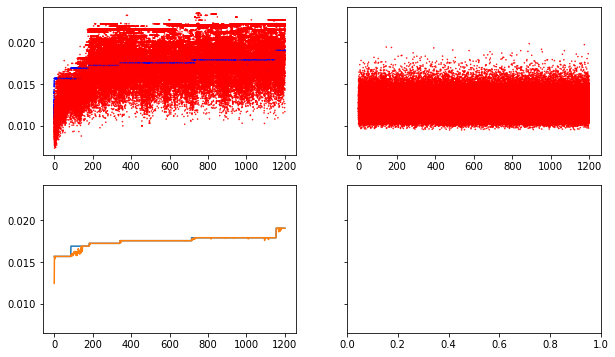

In [82]:
# print(tsp.validArrHistory[0])
# print(tsp.validArrHistory[-1])

# print(tsp.pop[np.argmax(tsp.fitArr)])

# benchmarkSolution = np.append(np.arange(nodes), 0)
# benchmarkFit = tsp.computeFitness(benchmarkSolution)

# plots
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharey=True)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])

tspRows = np.ones_like(tsp.fitArrHistory)
for row in range(tsp.fitArrHistory.shape[0]):
    tspRows[row] *= row
axs[0, 0].scatter(
    tspRows.flatten(),
    tsp.fitArrHistory.flatten(),
    s=0.3,
    c=tsp.validArrHistory.flatten(),
    cmap=cmap,
)

randRows = np.ones_like(rand.fitArrHistory)
for row in range(rand.fitArrHistory.shape[0]):
    randRows[row] *= row
axs[0, 1].scatter(
    randRows.flatten(),
    rand.fitArrHistory.flatten(),
    s=0.3,
    c=rand.validArrHistory.flatten(),
    cmap=cmap,
)
# axs[0].legend()

axs[1, 0].plot(
    range(tsp.history.shape[0]),
    tsp.history[:,0],
    label='Max')
axs[1, 0].plot(
    range(tsp.history.shape[0]),
    tsp.history[:,1],
    label='Mean')
# axs[1, 0].hlines(
#     benchmarkFit,
#     0,
#     tsp.history.shape[0],
#     linestyles='dashed',
#     colors='k',
#     label='Benchmark')

# # # = axs[1].twinx()
# axs[1, 1].plot(
#     range(tsp.history.shape[0]),
#     tsp.history[:,2],
#     label='Unique solutions %',
#     # color='red'
#     )

# axs[1, 1].plot(
#     range(tsp.history.shape[0]),
#     tsp.history[:,3],
#     label='Valid solutions %',
#     # color='red'
#     )

# # ax1.plot(x, y1, 'g-')
# # ax2.plot(x, y2, 'b-')

# # ax1.set_xlabel('X data')
# # ax1.set_ylabel('Y1 data', color='g')
# # ax2.set_ylabel('Y2 data', color='b')

# axs[1].legend()
# axs[2].legend()#loc=(1.01,0.5))
plt.show()

# New section